Loan Prediction Analysis using Python.

Let’s look at the steps that we will follow

1) Problem Statement

2) Hypothesis Generation

3) Getting the system ready and loading the data

4) Exploratory Data Analysis (EDA)

5) Missing value

6) Data Visualisation 


# Problem Statement

Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

After looking at the problem statement, we will now move into hypothesis generation. It is the process of listing out all the possible factors that can affect the outcome.

# Hypothesis generation

This is a very important stage. It involves understanding the problem in detail by brainstorming as many factors as possible which can impact the outcome. It is done by understanding the problem statement thoroughly and before looking at the data.

Below are some of the factors that can affect the Loan Approval (dependent variable for this loan prediction problem):

Salary: Applicants with high income should have more chances of loan approval.

Previous history: Applicants who have repayed their previous debts should have higher chances of loan approval.

Loan amount: Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high.

Loan term: Loan for less time period and less amount should have higher chances of approval.

EMI: Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.



In [1]:
#Pandas is used for Data Processing and is also the most popular library in python used for data analysis .
#Import libraries
import os
import pandas as pd
import numpy as np                     # For mathematical calculations 


#import libraries for plots
import matplotlib.pyplot as plt        # For plotting graphs 
import seaborn as sns                  # For data visualization 
%matplotlib inline
import warnings                        # To ignore any warnings warnings.filterwarnings("ignore")


In [2]:
#Print Working Directory is a terminal command that will output the path to the current directory that you are working in.
%pwd

'C:\\Users\\Asha Joshi'

In [3]:
#change directory to worrking directory
%cd C:\Users\Asha Joshi\Downloads

C:\Users\Asha Joshi\Downloads


In [4]:
#Importing dataset
#Load Data
#read data 
train= pd.read_csv("train_ctrUa4K.csv")
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
# Let’s make a copy of train data so that even if we have to make any changes in these datasets we would not
# lose the original datasets.

train_original=train.copy() 

# Exploratory Data Analysis 


In [6]:
# First 5 rows of data
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
train.columns
#Replacing the spaces between the variable names with underscore
train.columns = train.columns.str.replace(' ', '_')
# First 5 rows of data
train[:5]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
type(train)

pandas.core.frame.DataFrame

In [9]:
# Data Types of all the variables
train.dtypes
#These are the different types of data present in the data set like Integer,Float,Object


Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

We can see there are three format of data types:

object: Object format means variables are categorical. Categorical variables in our dataset are: Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status

int64: It represents the integer variables. ApplicantIncome is of this format.

float64: It represents the variable which have some decimal values involved. They are also numerical variables. Numerical variables in our dataset are: CoapplicantIncome, LoanAmount, Loan_Amount_Term, and Credit_History

In [10]:
#Check summary of the data 
train.describe()
#This describes the basic statistics of the data like mean, standard deviation, minimum,maximum,
#1st quartile,2nd quartile,3rd quartile etc

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [11]:
#concise summary of the data (information of all columns)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [12]:
#Let’s look at the shape of the dataset.

print(train.shape)

#no of rows and columns
print("Row : Columns")
print(train.shape[0],train.shape[1])
#print columns
print(train.columns)

#The shape gives the number of rows and columns in the data. Here, 614 rows and 13 columns are present.
#We have 12 independent variables and 1 target variable, i.e. Loan_Status in the train dataset.

(614, 13)
Row : Columns
614 13
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [13]:
# Number of Unique values present in the data 
train.nunique()
#using for loop 
# for i in data.columns:
#    print(i,'-',len(data[i].value_counts()))

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [14]:
train['Gender'].value_counts()


Male      489
Female    112
Name: Gender, dtype: int64

In [15]:
train['Married'].value_counts()


Yes    398
No     213
Name: Married, dtype: int64

In [16]:
train['Dependents'].value_counts()


0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [17]:
train['Education'].value_counts()


Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [18]:
train['Self_Employed'].value_counts()


No     500
Yes     82
Name: Self_Employed, dtype: int64

In [19]:
train['Loan_Amount_Term'].value_counts()


360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [20]:
train['Credit_History'].value_counts()


1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [21]:
train['Property_Area'].value_counts()


Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [22]:
train['Loan_Status'].value_counts()


Y    422
N    192
Name: Loan_Status, dtype: int64

# Missing value imputation


In [23]:
train.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History features.

We will treat the missing values in all the features one by one.

We can consider these methods to fill the missing values:

For numerical variables: imputation using mean or median For categorical variables: imputation using mode There are very less missing values in Gender, Married, Dependents, Credit_History and Self_Employed features so we can fill them using the mode of the features.

In [24]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True) 
train['Married'].fillna(train['Married'].mode()[0], inplace=True) 
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

Now let’s try to find a way to fill the missing values in Loan_Amount_Term. We will look at the value count of the Loan amount term variable.

In [25]:
train['Loan_Amount_Term'].value_counts()


360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [26]:
# It can be seen that in loan amount term variable, the value of 360 is repeating the most. So we will 
# replace the missing values in this variable using the mode of this variable.

train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)


Now we will see the LoanAmount variable. As it is a numerical variable, we can use mean or median to impute the missing values. We will use median to fill the null values as earlier we saw that loan amount have outliers so the mean will not be the proper approach as it is highly affected by the presence of outliers.


In [27]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)


In [28]:
#Now lets check whether all the missing values are filled in the dataset.

train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Data Visualisation 

In this section, we will do univariate analysis. It is the simplest form of analyzing data where we examine 
each variable individually. For categorical features we can use frequency table or bar plots which will 
calculate the number of each category in a particular variable. For numerical features, probability 
density plots can be used to look at the distribution of the variable.

# Univariate Analysis


In [29]:
# #Target Variable
# We will first look at the target variable, i.e., Loan_Status. As it is a categorical variable, 
# let us look at its frequency table, percentage distribution and bar plot.

# Frequency table of a variable will give us the count of each category in that variable.



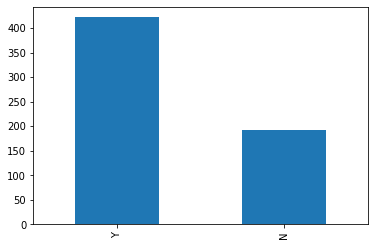

In [30]:
train['Loan_Status'].value_counts().plot.bar()

The loan of 422(around 69%) people out of 614 was approved. Now lets visualize each variable separately. Different types of variables are Categorical, ordinal and numerical.

Categorical features: These features have categories (Gender, Married, Self_Employed, Credit_History, Loan_Status) Ordinal features: Variables in categorical features having some order involved (Dependents, Education, Property_Area) Numerical features: These features have numerical values (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term)

# Let’s Visualize the categorical and ordinal features first.
Independent Variable (Categorical)

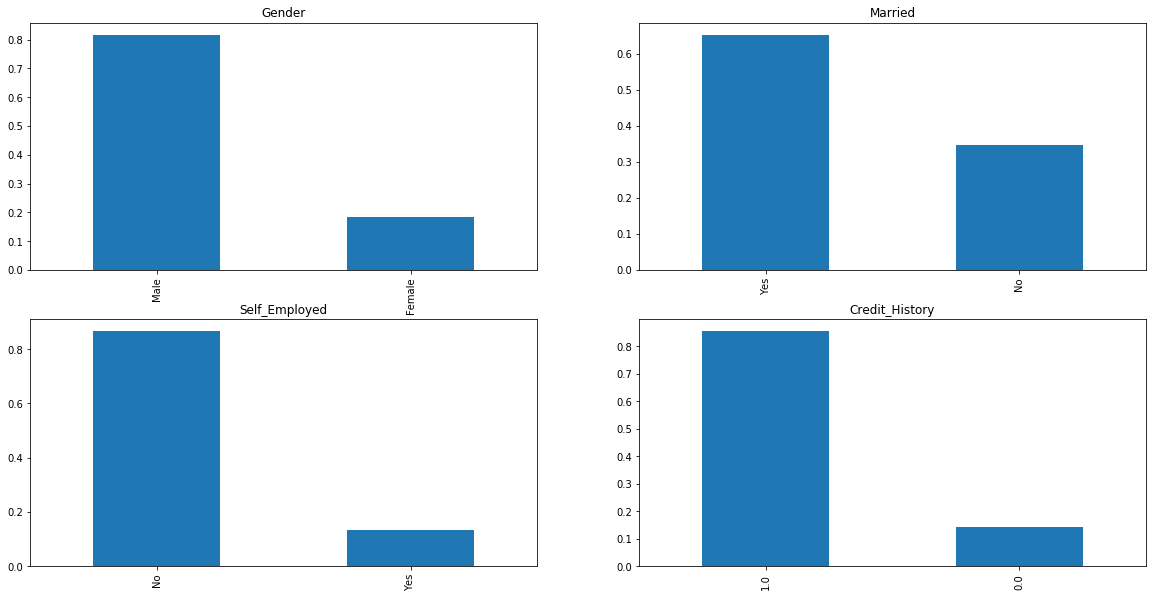

In [31]:
plt.figure(1) 
plt.subplot(221) 
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender') 
plt.subplot(222) 
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 
plt.subplot(223) 
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 
plt.subplot(224) 
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History') 
plt.show()

It can be inferred from the above bar plots that:

80% applicants in the dataset are male. Around 65% of the applicants in the dataset are married. Around 15% applicants in the dataset are self employed. Around 85% applicants have repaid their debts.

Independent Variable (Ordinal)

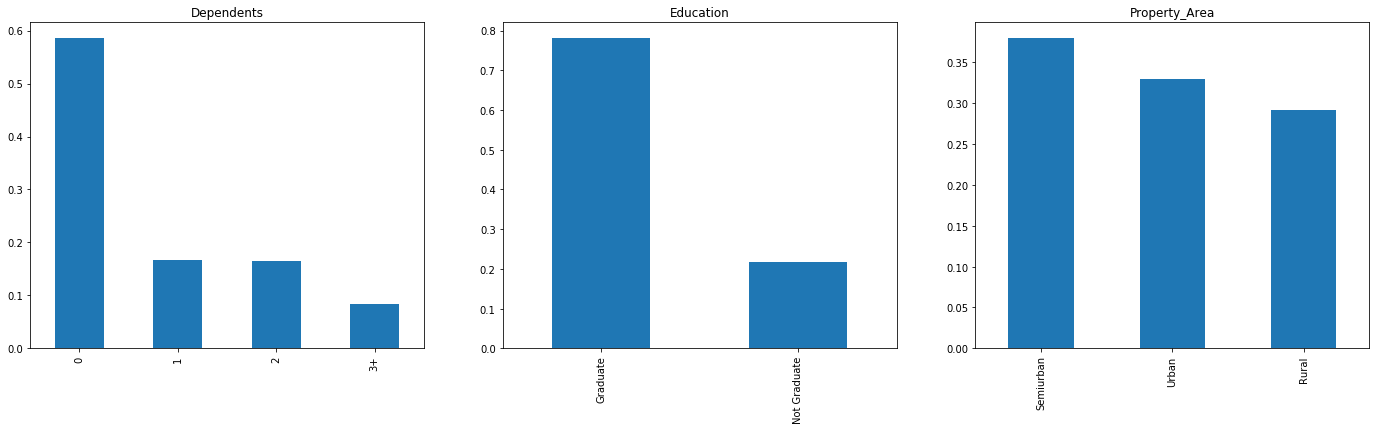

In [32]:
plt.figure(1) 
plt.subplot(131) 
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Dependents') 
plt.subplot(132) 
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education') 
plt.subplot(133) 
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area') 
plt.show()

Following inferences can be made from the above bar plots:

Most of the applicants don’t have any dependents.

Around 80% of the applicants are Graduate.

Most of the applicants are from Semiurban area.

# Independent Variable (Numerical)

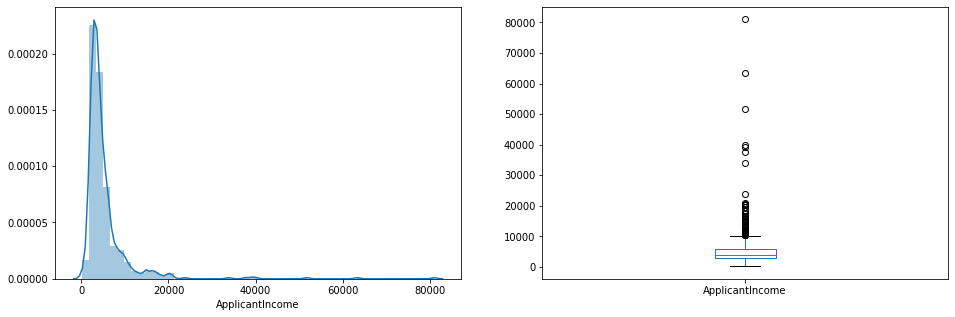

In [33]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['ApplicantIncome']); 
plt.subplot(122) 
train['ApplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

It can be inferred that most of the data in the distribution of applicant income is towards left which means it is not normally distributed.

The boxplot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels.

Let us segregate them by Education:

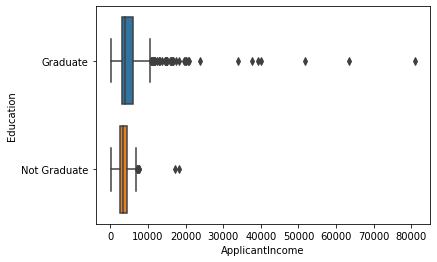

In [34]:
sns.boxplot(train['ApplicantIncome'],train['Education'])
#train.boxplot(column='ApplicantIncome', by = 'Education') 
#plt.suptitle("")


In [35]:
# We can see that there are a higher number of graduates with very high incomes, which are appearing to be the outliers.

# Let’s look at the Coapplicant income distribution.

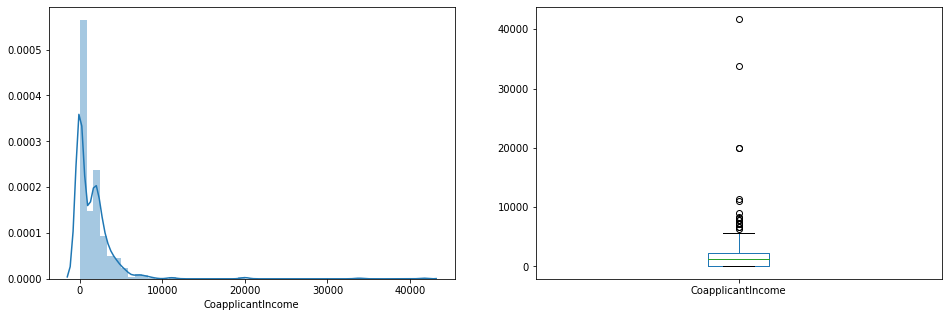

In [36]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['CoapplicantIncome']); 
plt.subplot(122) 
train['CoapplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

In [37]:
# We see a similar distribution as that of the applicant income. Majority of coapplicant’s income ranges from 0 to 5000. 
# We also see a lot of outliers in the coapplicant income and it is not normally distributed.
# Let’s look at the distribution of LoanAmount variable.

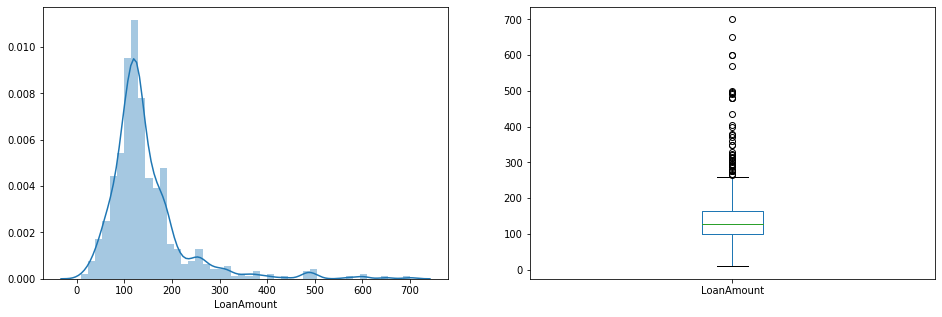

In [38]:
plt.figure(1) 
plt.subplot(121) 
df=train.dropna() 
sns.distplot(df['LoanAmount'])
plt.subplot(122) 
train['LoanAmount'].plot.box(figsize=(16,5)) 
plt.show()

We see a lot of outliers in this variable and the distribution is fairly normal. We will treat the outliers later .

Now we would like to know how well each feature correlate with Loan Status. So, now we will look 
at bivariate analysis.

# Categorical Independent Variable vs Target Variable


First of all we will find the relation between target variable and categorical independent variables. 
Let us look at the stacked bar plot now which will give us the proportion of approved and unapproved loans.

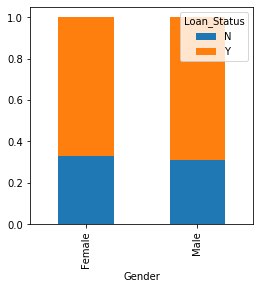

In [39]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status']) 
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

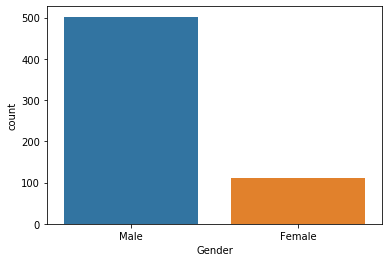

In [40]:
sns.countplot(train["Gender"])

It can be inferred that the proportion of male and female applicants is more or less same for both approved and 
unapproved loans.

Now let us visualize the remaining categorical variables vs target variable.


In [41]:
#sns.boxplot(train['Married'],train['Loan_Status'])

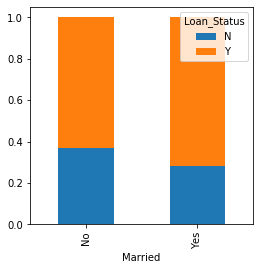

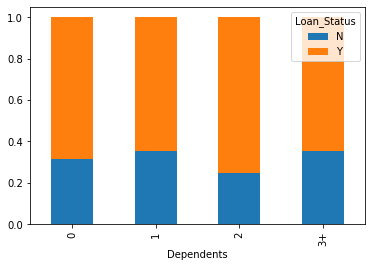

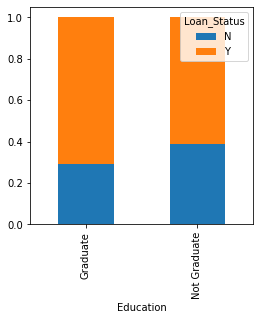

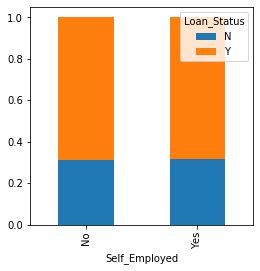

In [42]:
Married=pd.crosstab(train['Married'],train['Loan_Status']) 
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status']) 
Education=pd.crosstab(train['Education'],train['Loan_Status']) 
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status']) 
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show() 
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show()

Proportion of married applicants is higher for the approved loans.
Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.
There is nothing significant we can infer from Self_Employed vs Loan_Status plot.
Now we will look at the relationship between remaining categorical independent variables and Loan_Status.

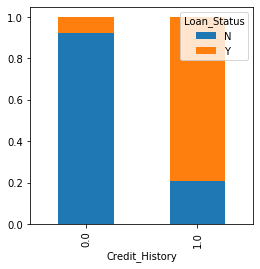

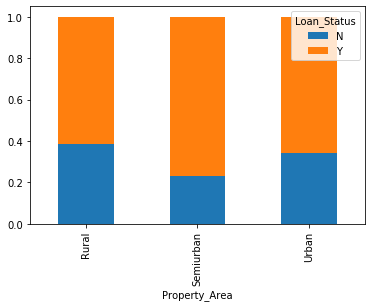

In [43]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status']) 
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status']) 
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show()


It seems people with credit history as 1 are more likely to get their loans approved.
Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.
